# Read many SMILES from the 250k random zinc molecules

In [9]:
import sys
import os
import time
import glob
import csv
import numpy as np
import pandas as pd
import PIL
from random import sample

from data import sanitize_smiles

import SmilesEnumerator

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Fingerprints import FingerprintMols

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function
from __future__ import division
import math


import torch 
import torchvision
import torchvision.transforms as transforms
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


torch.manual_seed(1)



print(tables_list)
print(tables_list[0]) 



['/home/jgmeyer2/LINCS/cp_trt.smi']
/home/jgmeyer2/LINCS/cp_trt.smi


Loop through the tables found above, take the first column containing smiles text, and append to master list

In [16]:
### zinc 250k molecules
tables_list=glob.glob("*.smi")
print(tables_list)
smileslist = []
        
for table in tables_list:
    with open(table) as inf:
        reader = csv.reader(inf, delimiter="\t")
        smiles = list(zip(*reader))[0]
        smileslist.extend(list(smiles)[1:])
        print(table)
    
print(len(smileslist))
print(smileslist[0])

#smiles= smileslist[1:len(smileslist)]  ### cut the first line, which is the header

print(type(tables_list))

['250k_rndm_zinc_drugs_clean.smi']
250k_rndm_zinc_drugs_clean.smi
249455
C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
<class 'list'>


In [12]:
data_path = glob.glob("/home/jgmeyer2/LINCS/*.smi")
print(data_path)

['/home/jgmeyer2/LINCS/cp_trt.smi']


In [22]:
### LINCSmolecules

with open("/home/jgmeyer2/LINCS/cp_trt.smi") as f:
    smiles = f.readlines()
print(smiles[0])
print(type(data_path))
smileslist = smiles

CC1CS(=O)(=O)CCN1N=Cc1ccc(o1)[N+]([O-])=O

<class 'list'>


In [6]:
#### Randomly sample the SMILES
import random
subsmiles=random.sample(smileslist,1000)

# Convert SMILES to numeric strings

##### What lengths are allowed, and what are the characters?

minimum length 1
maximum length 459


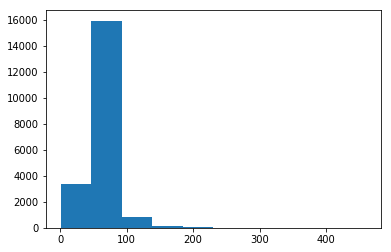

In [23]:
smileslens = [len(i) for i in smileslist]
plt.hist(smileslens)
print("minimum length " + str(min(smileslens)))
print("maximum length " + str(max(smileslens)))



In [24]:
uniquechars = set(''.join(smileslist))
#set(smileslist)
print(" number of unque characters "+ str(len (uniquechars)))
''.join(uniquechars)

 number of unque characters 49


'80ui#nrL([BSl3%]\nP9=./125gC@N-)IAoeFcsOMta+\\6d47H'

In [25]:
sanitized_unbiased = list(np.unique(sanitize_smiles(smileslist))[0:])

/home/jgmeyer2/vangan/gans/data.py:167: UserWarning: Unsanitized SMILES string: 

  warnings.warn('Unsanitized SMILES string: ' + sm, UserWarning)


In [26]:
print(len(sanitized_unbiased))
sanitized_unbiased[0:10]

20324


['',
 'BrC1C(Br)C(Br)C(Br)C(Br)C1Br',
 'Brc1c(Br)c(Br)c2[nH]nnc2c1Br',
 'Brc1c(NC2=NCCN2)ccc2nccnc12',
 'Brc1cc2c(cc1C1Nc3ccccc3C3C=CCC31)OCO2',
 'Brc1ccc(-c2csc(N3CCC(c4nn[nH]n4)CC3)n2)cc1',
 'Brc1ccc(-c2csc(N3CCNCC3)n2)cc1',
 'Brc1ccc(CSc2nnc(-c3ccccn3)n2Cc2ccco2)cc1',
 'Brc1ccc2c(c1)CN1CCCC1=N2',
 'Brc1csc(N2CCNCC2)n1']

In [27]:
print(len(sanitized_unbiased))
sorted(smileslist)[0:10]

20324


['\n',
 'BrC1C(Br)C(Br)C(Br)C(Br)C1Br\n',
 'BrCC(=O)NCCc1c[nH]c2ccccc12\n',
 'BrCC(=O)NCCc1ccc2ccccc2c1\n',
 'BrCC(=O)NCCc1ccccc1\n',
 'Brc1c(Br)c(Br)c2[nH]nnc2c1Br\n',
 'Brc1c(NC2=NCCN2)ccc2nccnc12\n',
 'Brc1c[nH]c2nc(SCc3ccccc3C#N)nc2c1\n',
 'Brc1cc2OCOc2cc1C3Nc4ccccc4C5C=CCC53\n',
 'Brc1ccc(CSc2nnc(c3ccccn3)n2Cc4ccco4)cc1\n']

In [41]:
### compare the two lists, they are exactly the same
list(set(smileslist)-set(sanitized_unbiased))

[]

In [55]:
subsmiles

['CC(C)(CNC(=O)N1CCC[C@@H]1C[NH+]1CCC[C@@H]1CO)c1ccccc1F',
 'COCc1cc(C[NH2+]CC(=O)NC2CCCCCCC2)n[nH]1',
 'CC(=O)Nc1ccc(OCC(=O)N[C@@H](C)c2ccc(Cl)cc2)cc1',
 'COc1ccc2c(c1)[C@H]([NH3+])[C@@H](n1ncc3ccccc31)C2',
 'Cc1cc(C)c(CN2CCC[C@H](c3nncn3C3CC3)C2)c(C)c1',
 'C[C@H](CCc1ccccc1)CC(=O)N1CC[S@](=O)C(C)(C)C1',
 'CCc1ccc([C@@H]2CC[NH2+]C[C@H]2CC(C)C)s1',
 'COC(=O)c1cc(Sc2ccc(O)cc2)ccc1[N+](=O)[O-]',
 'CC(=O)NCCNC(=O)N1CCN(C)c2ccccc2C1',
 'Cn1cc(C#N)cc1C(=O)[C@H](C#N)c1nnc(-c2ccccc2)n1C',
 'CC(C)Oc1ccc(C(=O)Nc2ccccc2Br)cn1',
 'CC[NH+](CC)CCCNC(=O)c1sc2cc(F)ccc2c1Cl',
 'CCCCN(C)C(=O)NCCNC(=O)c1ccccc1Cl',
 'N#C/C(=C\\c1ccc(OS(=O)(=O)c2ccccc2)cc1)c1ccc([N+](=O)[O-])cc1',
 'Cc1cccc(NCC(=O)N2CCN(S(=O)(=O)c3ccc4c(c3)CCC4)CC2)c1C',
 'COC(=O)c1coc(CN2CCN(c3ccc(OC)cc3)C(=O)[C@H]2C)n1',
 'Cc1cccc(N(CC(=O)Nc2cccc(Br)c2)S(C)(=O)=O)c1',
 'COc1ccc(CCNS(=O)(=O)c2cc(F)cc(F)c2)cc1OC',
 'CNC(=O)[C@H]1CN(CCS(=O)(=O)c2ccccc2)CCN1C(=O)c1cccc(C(F)(F)F)c1',
 'Cc1ccc(CSCCNS(=O)(=O)N2CCCCC2)cc1',
 'C[C@H](Cl)CCc1c[nH

# Draw the SMILES, build a table that maps them to their file name for the subsequent training

Draw the smiles

In [107]:
PATH = "smiles400px/"

os.makedirs(directory,exist_ok=True)


smiles = subsmiles ## for testing with smaller batch of smiles
print(len(smiles))

print(f'{PATH}str(i).png')
i=0
for x in smiles:
    x_mol = Chem.MolFromSmiles(str(x))
    Draw.MolToFile(x_mol, fileName="./"+PATH+str(i)+".png", size=(500, 500), kekulize=True, wedgeBonds=True, imageType="png")
    i+=1
    
### since all SMILE produce valid images, 
### we can build the table exactly mapping to the position in smiles list
rows = zip(smiles, range(0, len(smiles)))
import csv

with open(f'{PATH}smiles2png_map.csv', "w") as f:
    writer = csv.writer(f)
    writer.writerow(["smiles","pngname"])
    for row in rows:
        writer.writerow(row)


1000
smiles400px/str(i).png


##### To Do: insert part to check png file versus http://hulab.rxnfinder.org/smi2img/ 

#### read the png into np array file using PIL

In [5]:
PATH = "smiles400px/"

label_csv = f'{PATH}smiles2png_map.csv'
n = len(list(open(label_csv)))-1
val_idxs=sample(list(range(n)),round(n*0.2)) ## random 20% for validation set
print("total samples = " + str(n))
print("validation set = " + str(len(val_idxs)))


total samples = 1000
validation set = 200


In [6]:
label_df = pd.read_csv(label_csv, dtype=str)
label_df.head()
pngnamelist = label_df.pngname.tolist()

#pngnamelist.join('.png')
pngnamelist[10]

type(pngnamelist[0])
pngnamelist = [s + ".png" for s in pngnamelist]

In [137]:
fn = PATH + pngnamelist[0]; fn

'smiles400px/0.png'

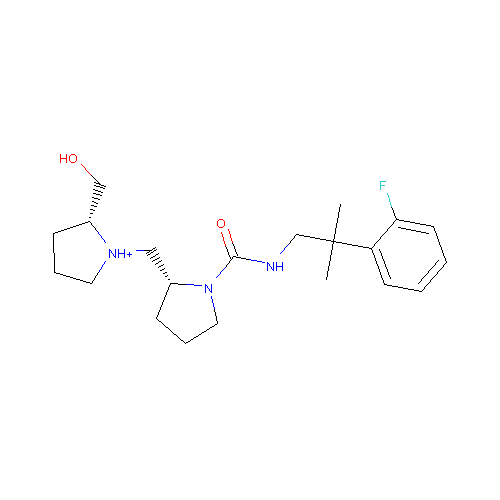

In [140]:
img = PIL.Image.open(fn); img

In [141]:
img.size

(500, 500)

In [143]:
size_d = {k: PIL.Image.open(PATH+k).size for k in pngnamelist}
size_d

{'0.png': (500, 500),
 '1.png': (500, 500),
 '2.png': (500, 500),
 '3.png': (500, 500),
 '4.png': (500, 500),
 '5.png': (500, 500),
 '6.png': (500, 500),
 '7.png': (500, 500),
 '8.png': (500, 500),
 '9.png': (500, 500),
 '10.png': (500, 500),
 '11.png': (500, 500),
 '12.png': (500, 500),
 '13.png': (500, 500),
 '14.png': (500, 500),
 '15.png': (500, 500),
 '16.png': (500, 500),
 '17.png': (500, 500),
 '18.png': (500, 500),
 '19.png': (500, 500),
 '20.png': (500, 500),
 '21.png': (500, 500),
 '22.png': (500, 500),
 '23.png': (500, 500),
 '24.png': (500, 500),
 '25.png': (500, 500),
 '26.png': (500, 500),
 '27.png': (500, 500),
 '28.png': (500, 500),
 '29.png': (500, 500),
 '30.png': (500, 500),
 '31.png': (500, 500),
 '32.png': (500, 500),
 '33.png': (500, 500),
 '34.png': (500, 500),
 '35.png': (500, 500),
 '36.png': (500, 500),
 '37.png': (500, 500),
 '38.png': (500, 500),
 '39.png': (500, 500),
 '40.png': (500, 500),
 '41.png': (500, 500),
 '42.png': (500, 500),
 '43.png': (500, 500)

In [146]:
row_sz, col_sz = list(zip(*size_d.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)
row_sz[:5]

array([500, 500, 500, 500, 500])

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([499.5, 499.6, 499.7, 499.8, 499.9, 500. , 500.1, 500.2, 500.3,
        500.4, 500.5]),
 <a list of 10 Patch objects>)

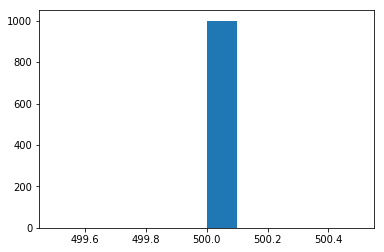

In [147]:
plt.hist(row_sz)

In [148]:
224*224*100

5017600

In [150]:
500*500*20

5000000

In [173]:
scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
to_tensor = transforms.ToTensor()

t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
t_img
img.mode
if img.mode=='RGB':
    img_shape = (3, img.width, img.height)
#t_img.shape
img_shape

(3, 500, 500)

##### determine dimensions of input and output 

### train the stackRNN to generate outputs with len=image

In [ ]:


class pngGen(nn.Module):
    def __init__(self):
        super(pngGen, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(100, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.shape[0], *img_shape)
        return img

In [175]:
#np.random.normal(0, 1, ({{number of smiles in batch//imgs.shape[0]}}, latent_dim))
np.random.normal(0, 1, (1, 100))

array([[ 0.76071507,  0.62571471,  0.77753856,  0.45463968, -0.01980997,
         1.18050454,  0.60649109,  0.08287252,  0.90721319,  0.48470982,
         1.73176476, -0.29496006,  1.2520505 , -0.76560342, -0.79559227,
         1.04027453,  0.20046649,  0.67954525, -0.96105722,  0.5425294 ,
        -0.01066329, -0.19872095,  1.62605922,  0.8398185 ,  0.01064423,
        -0.51108978,  0.63789356, -0.58372772,  1.51469798, -0.84065523,
         0.51189058, -0.24926872, -1.72433825,  0.48058698, -2.57943197,
         0.09051412,  0.31560558, -0.22623044,  2.09331296, -0.18710345,
         0.43067362,  0.67689857, -0.83708966, -0.88128978, -0.1281554 ,
         0.70510993, -0.31807588, -0.0255398 ,  0.96698817,  1.23149969,
        -1.44995346,  0.99777068,  0.93352514, -0.91128133, -2.88561037,
        -2.3740711 , -0.47538671,  0.23795877, -1.1816602 , -0.06867639,
         1.51824575, -1.28598358,  2.36496197,  1.18673357,  1.83925071,
        -1.34690517,  0.36634586,  0.4261503 , -0.3

In [ ]:
# old logger
#from utils import Logger
#logger = Logger(model_name='wGANGP', data_name='mol224')
#num_batches = len(dataloader)
n_epochs=500
batches_done = 0
### new logger
#configure("runs/test1",flush_secs=5)
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
np.random.normal(0, 1, (imgs.shape[0], latent_dim))

#batch_size=100
#print(latent_dim)
for epoch in range(n_epochs):
    for i, imgs in enumerate(dataloader):
        
        # Configure input
        real_imgs = Variable(imgs.type(Tensor))
        # ---------------------
        #  Train pngGen
        # ---------------------
        optimizer_G.zero_grad()
        
        # take smiles embedding as input
        z = Variable(Tensor( ****these are the smiles batch embedding**** ))
        # Generate a batch of images
        gen_imgs = generator(z)
        
        # Distance between real and generated image
        ### CHECK what the output of discriminator(real_img) is in the wgan_GP
        gen_real_dist = img_dist(real_imgs)
        # Fake images
        #fake_validity = discriminator(fake_imgs)
        # Gradient penalty
        #gradient_penalty = compute_gradient_penalty(discriminator, real_imgs.data, fake_imgs.data)
        
        # Adversarial loss
        #g_loss = -torch.mean(real_validity) + torch.mean(fake_validity) + lambda_gp * gradient_penalty
        
        ### LOSS will be some type of distance BTW real and fake
        g_loss = -torch.mean(gen_real_dist)
        g_loss.backward()
        optimizer_G.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
        )

        #logger.log(d_loss, g_loss, epoch, batches_done, num_batches)
        if batches_done % sample_interval/10 ==0:
            log_value('g_loss', g_loss, batches_done)
            log_value('d_loss', d_loss, batches_done)
            
        if batches_done % sample_interval == 0:
            save_image(fake_imgs.data[:25], "molpics500px/%d_b.png" % batches_done, nrow=5, normalize=True)

        batches_done += n_critic

##### Start with the stack RNN from ReLeaSE paper 

In [ ]:
#### RNN 
class smilesRNN2png(nn.Module):
    def __init__(self, input_dim, data):
        super(smilesRNN2png, self).__init__()
        
        self.data = data
        self.embedding = nn.Embedding(num_embeddings=input_dim, embedding_dim=250,
                                      padding_idx=0)  # Output: (N, W, embedding_dim)
        self.lstm = nn.LSTM(input_size=250, hidden_size=100, bidirectional=True,
                            num_layers=1)  # input(seq_len, batch, input_size)
        self.linear = torch.nn.Linear(in_features=200, out_features=100)
        self.relu = torch.nn.LeakyReLU() #SELU()logp,  #LeakyReLU()
        self.batch_norm = torch.nn.BatchNorm1d(num_features=100)
        self.output = torch.nn.Linear(in_features=100, out_features=1)
        

    def forward(self, inp, dropout=False):
        embedded = self.embedding(inp).permute(1, 0, 2)
        output = embedded
        output, _ = self.lstm(output)
        output = output[-1, :, :]
        output = self.linear(output)
        output = self.relu(output)
        output = self.output(output)
        return output

    def step(self, x, y, criterion, optimizer):
        # Reset gradient
        optimizer.zero_grad()
        fx = self.forward(x)
        loss = criterion(fx, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm(self.parameters(), max_norm=100)
        optimizer.step()
        return loss.data

    def predict(self, x):
        output = self.forward(x, dropout=False)
        return output.data
    
    def batch_char_tensor(self, smiles, use_cuda=True):
        tensor = torch.zeros(len(smiles), len(smiles[0])).long()
        for i in range (len(smiles)):
            string = smiles[i]
            for c in range(len(string)):
                tensor[i, c] = self.data.all_characters.index(string[c])
        if use_cuda:
            return Variable(tensor.cuda())
        else:
            return Variable(tensor)

    def iterate_minibatches(self, X, y, batchsize=100, use_cuda=True):
        n = X.shape[0]
        ind = np.random.permutation(n)
        for start_index in range(0, n, batchsize):
            X_batch = self.batch_char_tensor(X[ind[start_index:start_index + batchsize]])
            y_batch = y[ind[start_index:start_index + batchsize]]
            if use_cuda:
                yield (X_batch, Variable(torch.from_numpy(y_batch).float().cuda()))
            else:
                yield (X_batch, Variable(torch.from_numpy(y_batch).float()))

    def fit(self, criterion, optimizer, trX, trY, train_loss_log=[], num_epochs=100, batch_size=100):
        for epoch in range(num_epochs):
            train_err = 0
            train_batches = 0
            start_time = time.time()
            for batch in self.iterate_minibatches(trX, trY, batch_size):
                inputs, targets = batch
                train_err_batch = self.step(inputs, targets, criterion, optimizer)
                train_err += train_err_batch.cpu().numpy().mean()
                train_batches += 1
            print("Epoch {} of {} took {:.3f}s".format(
                epoch + 1, num_epochs, time.time() - start_time))
            train_loss_log.append(train_err / train_batches / batch_size)
            print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches / batch_size))
            # print("  train accuracy:\t\t{:.2f} %".format(
            #    train_acc / train_batches * 100))

        return train_loss_log

    def validate(self, teX, teY, batch_size=100, val_loss_log=[]):
        # Full pass over the validation data:
        val_loss = 0
        val_batches = 0
        for batch in self.iterate_minibatches(teX, teY, batch_size):
            inputs, targets = batch
            pred = self.predict(inputs)
            val_loss += ((pred - targets.data) ** 2).cpu().numpy().mean()
            val_batches += 1
        val_loss_log.append(val_loss / val_batches / batch_size)
        print("  validation loss:\t\t{:.6f}".format(
            val_loss / val_batches / batch_size))

        return val_loss_log

##### CHANGE LOSS to compare the true vector of image values to the stackRNN output

In [ ]:
models = []
train_logs = []
val_logs = []
num_epochs = 100
batch_size = 100

for i in range(5):
    
    train_loss_log = []
    val_loss_log = []
    
    models.append(smilesRNN2png(input_dim=my_data.n_characters, data=my_data))
    models[i].cuda()
    criterion = nn.MSELoss()
    optimizer = optim.Adadelta(models[i].parameters(), lr=0.1,  weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    
    trX = np.concatenate(cross_val_data[:i] + cross_val_data[i+1:])
    trY = np.concatenate(cross_val_labels[:i] + cross_val_labels[i+1:])
    teX = np.array(cross_val_data[i])
    teY = np.array(cross_val_labels[i])

    for epoch in range(num_epochs):
        scheduler.step()
        models[i].fit(criterion, optimizer, trX, trY.reshape(-1), train_loss_log, num_epochs=1, batch_size=batch_size)
        models[i].validate(teX, teY, batch_size = batch_size, val_loss_log=val_loss_log)
        
    train_logs.append(train_loss_log)
    val_logs.append(val_loss_log)
    plt.plot(train_loss_log)
    plt.plot(val_loss_log)

##### convert the stack RNN output to image 